In [3]:
# ANALIISA VISUALISASI DATA RETAIL

# Import library
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded=files.upload()

# Load data
data = pd.read_csv('retail_sales_dataset.csv')

# Tampilkan data awal
data.head(10)

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5


In [5]:
women_df = data[data['Gender'] == 'Female']
men_df = data[data['Gender'] == 'Male']

men_amount_mean = men_df['Total Amount'].mean()
men_amount_median = men_df['Total Amount'].median()
women_amount_mean = women_df['Total Amount'].mean()
women_amount_median = women_df['Total Amount'].median()

print(f"Men mean amount: {men_amount_mean}\t Median: {men_amount_median}")
print(f"Women mean amount: {women_amount_mean}\t Median: {women_amount_median}")
print(f"Difference between Mean: {abs(men_amount_mean-women_amount_mean)}\t Median: {abs(men_amount_median-women_amount_median)}")

Men mean amount: 455.42857142857144	 Median: 120.0
Women mean amount: 456.54901960784315	 Median: 150.0
Difference between Mean: 1.1204481792717047	 Median: 30.0


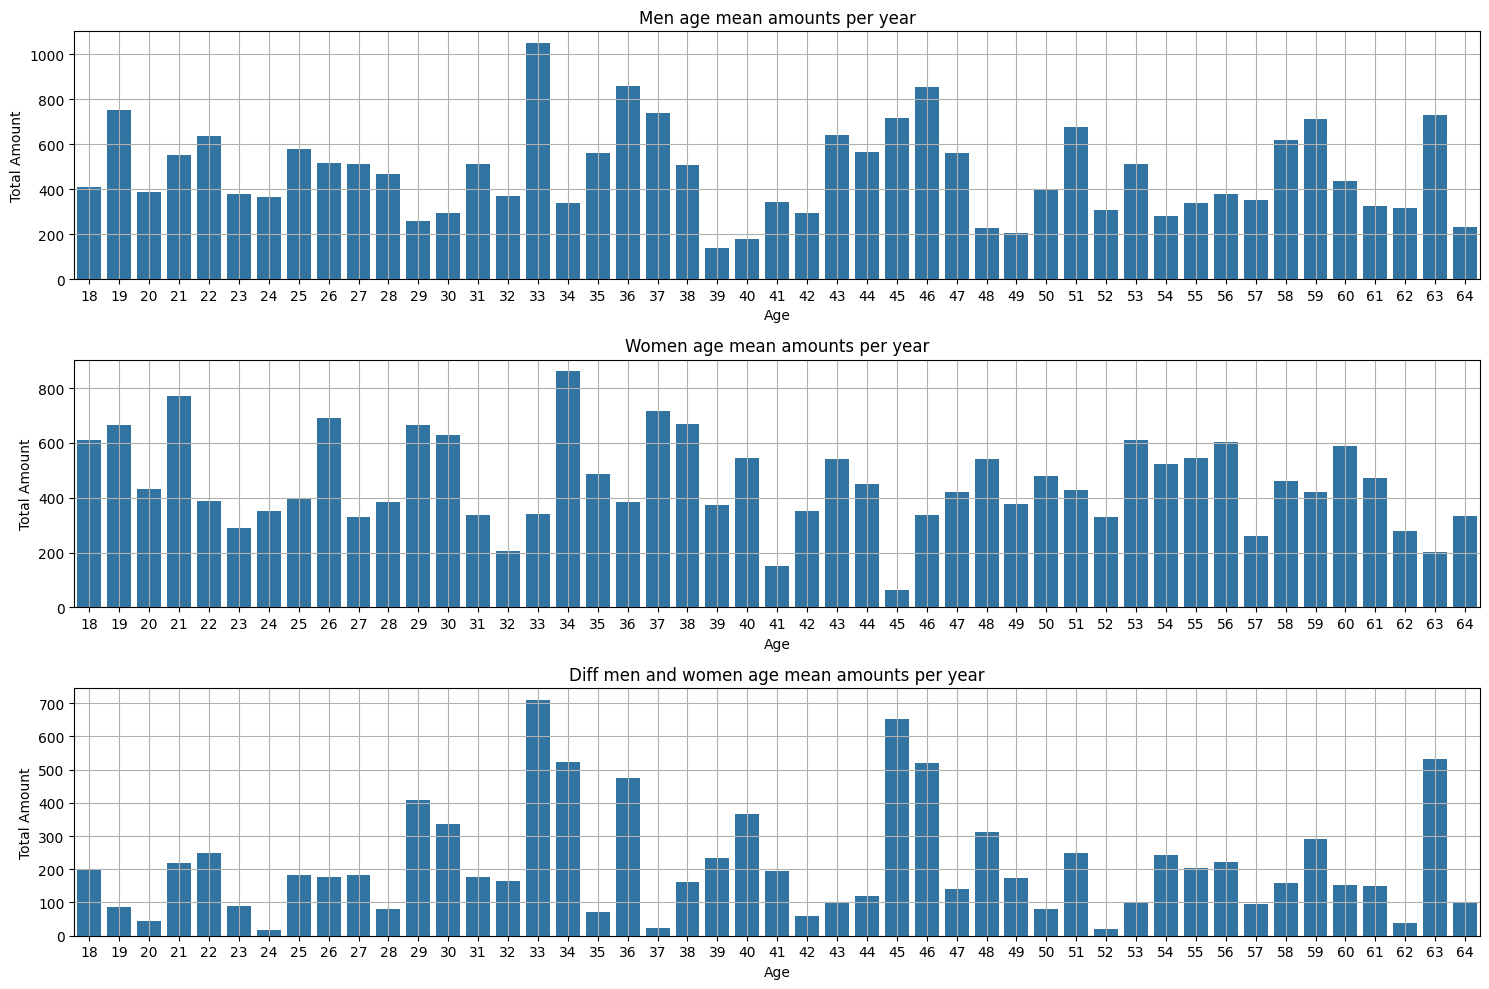

In [6]:
age_amount_per_year_men = pd.DataFrame(men_df.groupby(['Age'])['Total Amount'].mean()).reset_index()
age_amount_per_year_women = pd.DataFrame(women_df.groupby(['Age'])['Total Amount'].mean()).reset_index()
age_amount_per_year_diff = pd.DataFrame({
    'Age': age_amount_per_year_men['Age'],
    'Total Amount': abs(age_amount_per_year_men['Total Amount'] - age_amount_per_year_women['Total Amount'])
})

figure, ax = plt.subplots(3, 1, figsize=(15, 10))
sns.barplot(data=age_amount_per_year_men, x='Age', y='Total Amount', ax=ax[0])
ax[0].set_title('Men age mean amounts per year')
ax[0].grid()

sns.barplot(data=age_amount_per_year_women, x='Age', y='Total Amount', ax=ax[1])
ax[1].set_title('Women age mean amounts per year')
ax[1].grid()

sns.barplot(data=age_amount_per_year_diff, x='Age', y='Total Amount', ax=ax[2])
ax[2].set_title('Diff men and women age mean amounts per year')
ax[2].grid()

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Popularity of Product Categories Based on Transaction'}, xlabel='Product Category'>

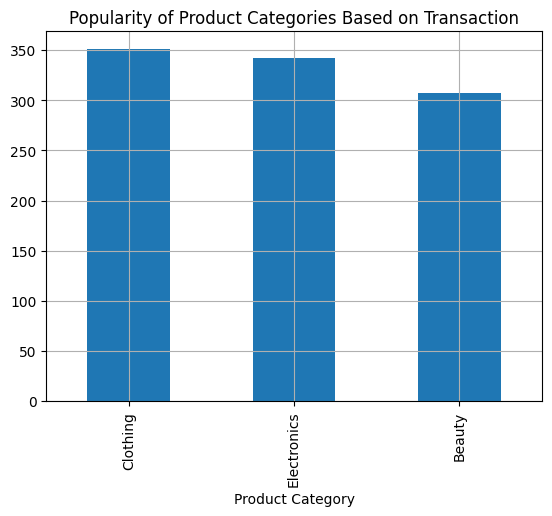

In [8]:
data["Product Category"].value_counts().plot(kind="bar",
                                             grid=True,
                                             title='Popularity of Product Categories Based on Transaction',)